# Developing an early warning system of heart disease using machine learning

## 1. Problem Identification
***
Heart disease is the leading cause of death in the US, and it produces immense health and economic burens 
__[(CDC 2020)]("https://www.cdc.gov/heartdisease/")__

* more than 600,000 people die from heart disease each year in the US - that's 1 in every 4 deaths 

* costs associated with health care services, medicines, and lost productivity due to death were estimated to be about $219 billion each year from 2014-2015 in the US 

* about 1 in 3 deaths related to heart diseases are preventable -- early action is important 
__[(MMWR 2014)]("https://www.cdc.gov/mmwr/preview/mmwrhtml/mm6317a1.htm")__ 
 
#### Given a set of health parameters from routine monitoring, can we robustly predict the risk of heart disease as early as possible?


> <img align='center' width='200' height='150' src="hd-facts.jpg">

### Dataset description: 

The original database contains 76 attributes, but all published studies refer to using a subset of 14 of them. This project used the Cleveland database downloaded from __[UCI Machine Learning Repository]("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/")__. Below is a description of each of the 14 attributes: 
> 1. **age**: age in years
2. **sex**: sex (1 = male; 0 = female)
3. **cp**: chest pain type 
     * 1: typical angina
     * 2: atypical angina
     * 3: non-anginal pain
     * 4: asymptomatic
4. **trestbps**: resting blood pressure (in mm Hg on admission to the hospital)
5. **chol**: serum cholestoral in mg/dl
6. **fbs**: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. **restecg**: resting electrocardiographic results
     * 0: normal; 
     * 1: having ST-T wave abnormality - T wave inversions and/or ST elevation or depression of > 0.05 mv; 
     * 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. **thalach**: maximum heart rate achieved
9. **exang**: exercise induced angina (1 = yes; 0 = no)
10. **oldpeak**: ST depression induced by exercise relative to rest
11. **slope**: the slope of the peak exercise ST segment 
     * 1: upsloping
     * 2: flat
     * 3: downsloaping
12. **ca**: number of major vessels (0-3) colored by flouroscopy
13. **thal**: a bood disorder called thalassemia 
     * 0=normal
     * 1=fixed defect
     * 2=reversable defect
14. **target**: heart disease (1 = yes; 0 = no)
*#14 is the response variable*; *#1-13 are predictor variables*

In [1]:
#load basic libraries
import os
import numpy as np #linear algebra
import pandas as pd # data processing, csv file I/O
import pandas_profiling 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')

## 2. Data wrangling
***
* data loading
* data definition: column names, data type, summary statistics, counts of unique values etc.
* data cleaning: missing values, duplicates etc.

In [2]:
cwd = os.getcwd()
print('The current working directory is %s' %cwd)

for subfolder in ['data','models','figures']:
    newdir = os.path.join(cwd,subfolder)
    if not os.path.exists(newdir):
        os.makedirs(newdir)
    
os.listdir()

The current working directory is /Users/hhl/Desktop/Springboard062020/Springboard/Capstone2


['Capstone2-Step0-Ideas.pdf',
 '.DS_Store',
 'hd-facts.jpg',
 'datasets_216167_477177_heart.csv',
 'Heart-Disease-Prediction-master',
 'cleveland.csv',
 'models',
 'processed.cleveland.data',
 'Capstone2-proposal [Hehuan Liao].docx',
 'figures',
 'Capstone2-Step1-Proposal.pdf',
 'Capstone_Two_Step_2__Data_Wrangling.pdf',
 '.ipynb_checkpoints',
 'datasets_heart.csv',
 'Capstone2-ideas [Hehuan Liao].docx',
 'data',
 'heart-v0.ipynb']

In [3]:
df = pd.read_csv('processed.cleveland.data',header=None)
df.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [6]:
df.isnull().sum().sort_values(ascending=True)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.ca.value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [8]:
df.thal.value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [9]:
df.replace('?',np.nan,inplace=True)

In [10]:
#fill na with mode
df[['ca','thal']] = df[['ca','thal']].fillna(df[['ca','thal']].mode().iloc[0])

In [11]:
df.ca.value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [12]:
df[df.duplicated()]  

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [13]:
df.thal.value_counts()

3.0    168
7.0    117
6.0     18
Name: thal, dtype: int64

In [14]:
df['target'] = df.target.map({0:0,
                             1:1,
                             2:1,
                             3:1,
                             4:1})
df['sex'] = df.sex.map({0:'female',
                       1:'male'})
df['cp'] = df.cp.map({1:'typical angina',
                     2:'atypical angina',
                     3:'non-anginal pain',
                     4:'asymptotic'})
df['fbs'] = df.fbs.map({1:'>120',
                       0:'<120'})
df['restecg'] = df.restecg.map({0:'normal',
                               1:'ST-T wave abnormality',
                               2:'left ventricular hyperthrophy'})
df['exang'] = df.exang.map({1:'yes',
                           0:'no'})
df['slope'] = df.slope.map({1:'upsloping',
                           2:'flat',
                           3:'downsloping'})
df['thal'] = df.thal.map({'3.0':'normal',
                         '6.0':'fixed',
                         '7.0':'reversable'})

In [15]:
df.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca           object
thal         object
target        int64
dtype: object

In [16]:
##assign appropriate data types -- what types are typically used for categorical, bool?-- object (text or mixed numeric and non-numeric)?
df['fbs'] = df.fbs.astype('bool')

In [17]:
df.nunique()

age          41
sex           2
cp            4
trestbps     50
chol        152
fbs           1
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            4
thal          3
target        2
dtype: int64

In [18]:
df.target.value_counts() ##relatively balanced

0    164
1    139
Name: target, dtype: int64

In [19]:
df.sex.value_counts()

male      206
female     97
Name: sex, dtype: int64

In [20]:
df.to_csv('data/heart_clean.csv',index=False)

## 3. Exploratory data analysis 
***
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

- pandas_profiling.ProfileReport()
  * data quality: data type, missings, unique values
  * data spread: summary statistics, and histograms
  * relationships between variables: scatter plots, correlation matrix etc.

In [21]:
df = pd.read_csv('data/heart_clean.csv')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    bool   
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    float64
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    float64
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: bool(1), float64(6), int64(1), object(6)
memory usage: 31.2+ KB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2
ca,303.0,0.663366,0.934375,0.0,0.0,0.0,1.0,3.0
target,303.0,0.458746,0.499120,0.0,0.0,0.0,1.0,1.0


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


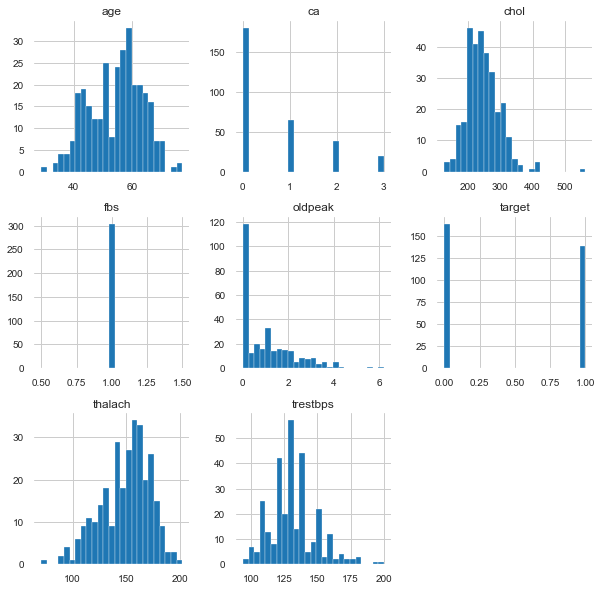

In [24]:
_=df.hist(bins=25,figsize=(10,10))

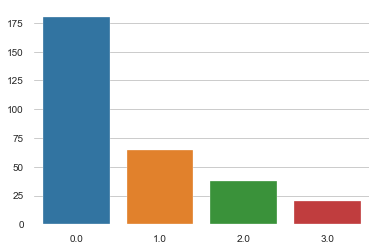

In [25]:
ca = pd.DataFrame(df.ca.value_counts())
_=sns.barplot(x=list(ca.index),y=list(ca.ca))

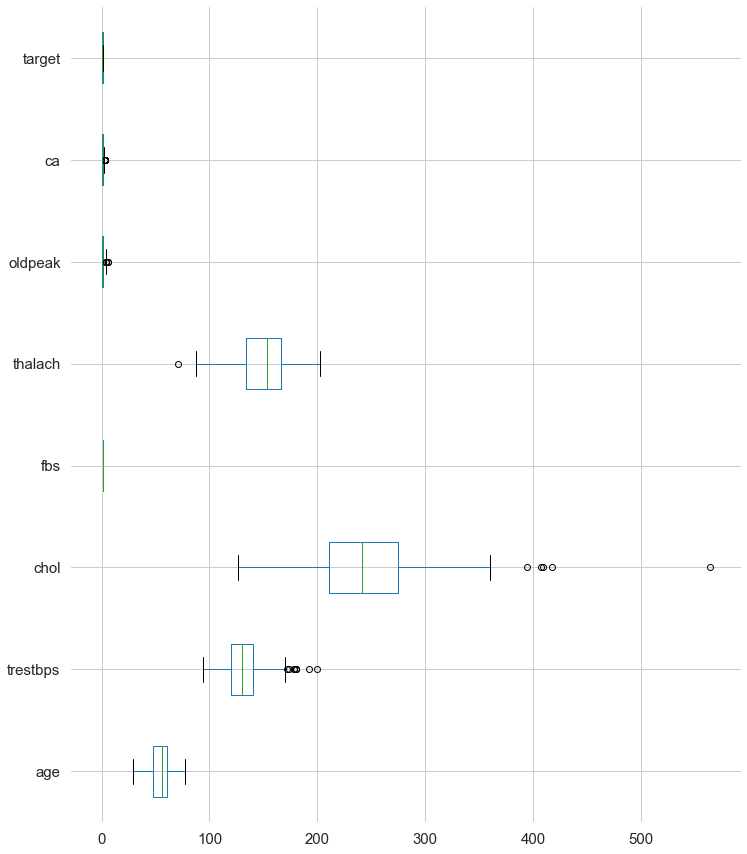

In [26]:
_=df.boxplot(grid=True,rot=0,figsize=(12,15),fontsize=15,vert=False)

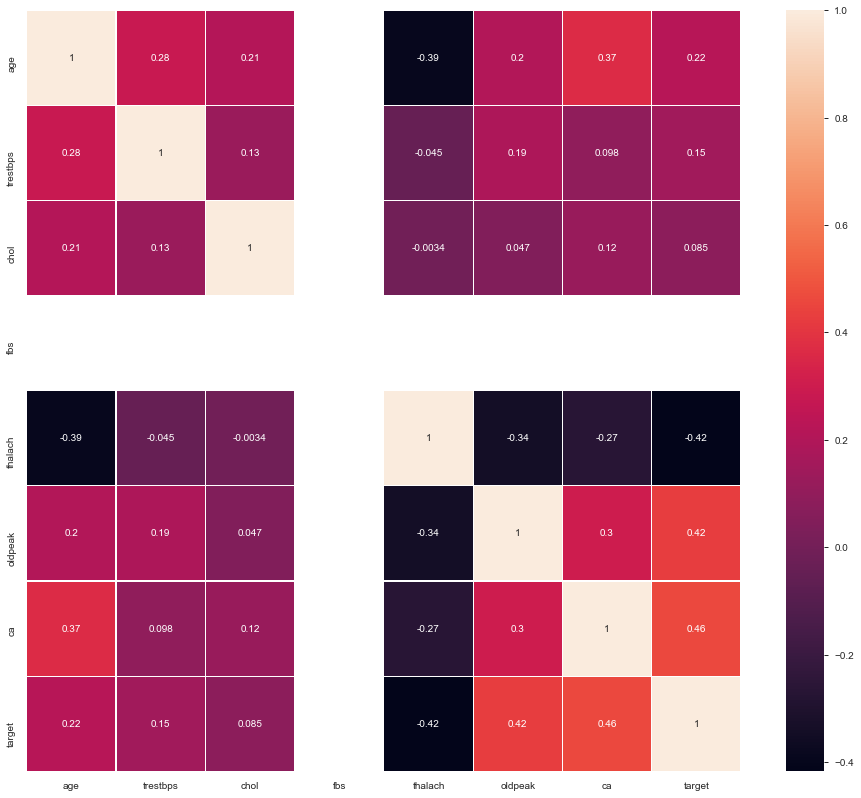

In [27]:
#Calculate the correlation coefficients
corr = df.corr()

corr.round(2).style.background_gradient(cmap='coolwarm')

plt.figure(figsize=(16,14))
_=sns.heatmap(corr,linewidths=.1, annot=True)

In [28]:
# profile = pandas_profiling.ProfileReport(df, title='Pandas profile report - heart attack dataset', minimal=False)
# profile.to_file(output_file='data/EDAreport.html')

## 4. Pre-processing and training data development
***
* Create dummy features for categorical variables
* Standardize the magnitude of numeric features
* Split into testing and training datasets

In [29]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,male,typical angina,145.0,233.0,True,left ventricular hyperthrophy,150.0,no,2.3,downsloping,0.0,fixed,0
1,67.0,male,asymptotic,160.0,286.0,True,left ventricular hyperthrophy,108.0,yes,1.5,flat,3.0,normal,1
2,67.0,male,asymptotic,120.0,229.0,True,left ventricular hyperthrophy,129.0,yes,2.6,flat,2.0,reversable,1
3,37.0,male,non-anginal pain,130.0,250.0,True,normal,187.0,no,3.5,downsloping,0.0,normal,0
4,41.0,female,atypical angina,130.0,204.0,True,left ventricular hyperthrophy,172.0,no,1.4,upsloping,0.0,normal,0


In [30]:
df.dtypes

age         float64
sex          object
cp           object
trestbps    float64
chol        float64
fbs            bool
restecg      object
thalach     float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
target        int64
dtype: object

In [31]:
#create dummy features for categorical variables
##sex, cp (chest pain type), restecg (resting electrocardiographic results), exang (exercise induced angina), slope (the slope of the peak exercise ST segment), and thal (blood disorder type) are categorical variables
##fbs is boolean; ca (number of major vessels) is ordinal
df2 = pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','thal'], drop_first=True)
df2.head()

,age,trestbps,chol,thalach,oldpeak,ca,target,sex_male,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hyperthrophy,restecg_normal,exang_yes,slope_flat,slope_upsloping,thal_normal,thal_reversable
0,63.0,145.0,233.0,150.0,2.3,0.0,0,1,0,0,1,1,0,0,0,0,0,0
1,67.0,160.0,286.0,108.0,1.5,3.0,1,1,0,0,0,1,0,1,1,0,1,0
2,67.0,120.0,229.0,129.0,2.6,2.0,1,1,0,0,0,1,0,1,1,0,0,1
3,37.0,130.0,250.0,187.0,3.5,0.0,0,1,0,1,0,0,1,0,0,0,1,0
4,41.0,130.0,204.0,172.0,1.4,0.0,0,0,1,0,0,1,0,0,0,1,1,0


In [32]:
#train-test split
from sklearn.model_selection import train_test_split
y = df2.target
X = df2.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.25, stratify=y, random_state=52)
#check whether the data is equally splitted or not (e.g. data imbalance problem)
print(y_train.value_counts())
print(y_test.value_counts())

0    123
1    104
Name: target, dtype: int64
0    41
1    35
Name: target, dtype: int64


In [33]:
#standardization (What about other standardization techniques, e.g. maxmin?)
from sklearn.preprocessing import StandardScaler
#build scaler based on training data and apply it to test data
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

## 5. Modeling
***
### Choose a ML algorithm - general guidelines:
####  Size of training set
 * small -- choose high bias/low variance classifier (e.g. Naive Bayes) to avoid overfitting
 * big -- low bias/high variance classifier (e.g. kNN) may be more powerful <br/><br/>

#### Classifiers 

* Naive Bayes
  * Super simple and fast
  * Cannot learn interactions btw features(assumes the predictors are independent) <br/><br/>

* Logistic Regression
  * lots of ways to regularize the model (e.g. lasso, ridge), and don't have to worry as much about features being correlated, like in Naive Bayes
  * have a nice probabilistic interpretation - use it if you want a probabilistic framework (_to easily adjust classification thresholds_) or if you expect to receive more training data in the future that you want to quickly incorporate into your model 
  * a linear classifier, assume some sort of linear relationship btw the data <br/><br/>
       
* K-Nearest Neighbors

* Support Vector Machines (SVMs)
  * high accuracy, especially popular in text classification problems where very high-dimensional spaces are the norm
  * non-probabilistic binary linear classifier
  * memory-intensive, hard to interpret, hard to tune <br/><br/>

* Decision trees / Ensemble methods: Random Forests
   * easy to interpret and explain
   * can handle feature interctions, non-parametric (don't have to worry about outliers or whether the data is linearly separable)
   * fast and scalable
   * don't support online learning - have to rebuild trees when new examples come on <br/><br/>
       ...
      
* AdaBoost, XGBoost
    
* LightGBM
 
* Linear Discriminant Analysis --- linear classification algorithm, best used when the data has a linear relationship
* Neural Networks

In [34]:
# LogisticRegression, RandomForestClassifier ---> optimize recall (sensitivity)
# first build a generic classifier and setup a param gird
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from sklearn.metrics import precision_recall_fscore_support as score, precision_recall_curve, roc_curve, roc_auc_score

##perform GridSearchCV-- set scoring='recall'
random_state = 52

mods = [LogisticRegression(random_state = random_state),
        RandomForestClassifier(random_state = random_state)]

lr_param_grid = {'C':np.logspace(-3,3,7),
                'penalty':['l1','l2']}
rf_param_grid = {'n_estimators':[100,200,300],
                'max_depth':[5,10,20,30,None],
                'max_features':['sqrt','auto','log2'],
                'min_samples_split':[3,5,10],
                 'bootstrap':[True,False]
                }
param = [lr_param_grid,rf_param_grid]

scoring = 'recall'

s = []
best_estimators = []

for i in range(len(mods)):
    model = GridSearchCV(mods[i],
                        param_grid=param[i],
                        cv=StratifiedKFold(n_splits=5),
                        scoring=scoring,
                        n_jobs=-1)
    model.fit(X_train_scaled, y_train)
    s.append(model.best_score_) #mean recall of model fitting best estimators
    best_estimators.append(model.best_estimator_)
    print(round(s[i],3))
    
cv_results = pd.DataFrame({'CV mean recall':s,
                           'Models':['LogisticRegression','RandomForest']})
    

0.808
0.799


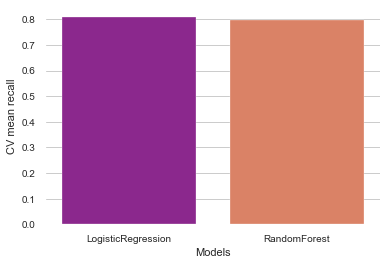

In [35]:
_=sns.barplot('Models','CV mean recall',data=cv_results,palette ='plasma')

In [36]:
best_estimators

[LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=52, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=10, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=5,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=52, verbose=0,
                        warm_start=False)]

In [37]:
#logistic regression -- with l2 regularization (Ridge)

lr = LogisticRegression(C=10,penalty='l2',random_state=random_state)
lr_model = lr.fit(X_train_scaled,y_train)
y_pred = lr_model.predict(X_test_scaled)

In [38]:
precision,recall,fscore,support = score(y_test, y_pred, pos_label=1, average='binary')
print('Precision:{} / Recall:{} / Accuracy:{}'.format(round(precision,3),
               round(recall,3),
               round((y_pred==y_test).sum()/len(y_pred),3)))

Precision:0.806 / Recall:0.829 / Accuracy:0.829


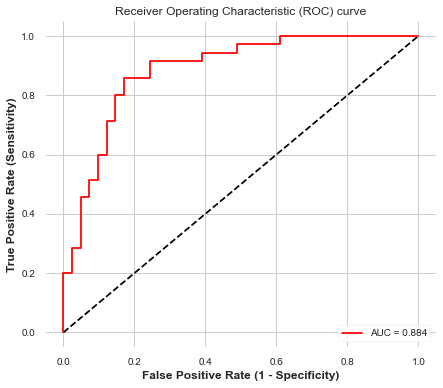

In [39]:
##ROC-AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, lr_model.predict_proba(X_test_scaled)[:,1])
roc_auc_ = auc(fpr,tpr)

plt.figure(figsize=(7,6))
_=plt.plot([0,1],[0,1],'k--')
_=plt.plot(fpr,tpr,'r',label='AUC = %.3f'%roc_auc_)
_=plt.title('Receiver Operating Characteristic (ROC) curve')
_=plt.xlabel('False Positive Rate (1 - Specificity)',fontsize=12,fontweight='bold')
_=plt.ylabel('True Positive Rate (Sensitivity)',fontsize=12,fontweight='bold')
_=plt.legend(loc='lower right')

Text(0.5, 1.0, 'Precision-Recall curve')

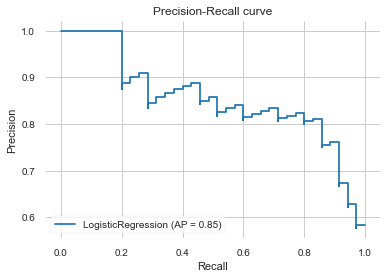

In [40]:
##precision-recall
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(lr_model,X_test_scaled,y_test)
disp.ax_.set_title('Precision-Recall curve')

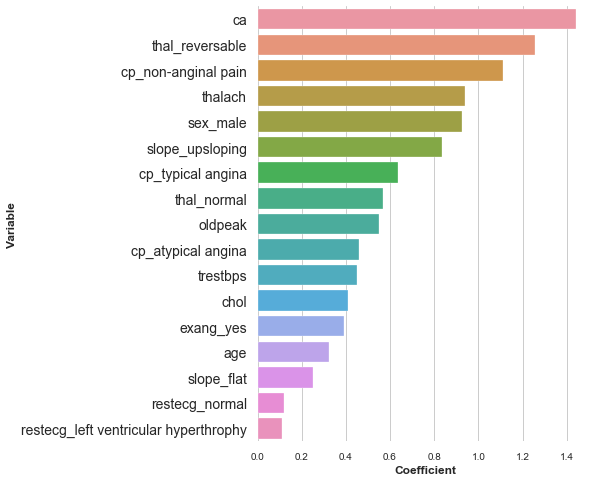

In [41]:
coef = abs(lr_model.coef_[0])
dat = pd.DataFrame(sorted(zip(coef, X_train.columns),reverse=True),columns=['Coefficient','Variable'])

plt.figure(figsize=(6,8))      
g=sns.barplot('Coefficient','Variable',data=dat)
g.set_xlabel('Coefficient',fontsize=12,weight='bold')
g.set_ylabel('Variable',size=12,weight='bold')
g.set_yticklabels(g.get_yticklabels(),size=14)
plt.show()
#ca(# of major vessels), thal(blood disorder),cp are among the most important factors to monitor in heart disease prediction

In [42]:
##random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc,accuracy_score

rf = RandomForestClassifier(n_estimators=100, max_depth=10, max_features='sqrt', min_samples_split=5, bootstrap=True,random_state=random_state, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

#output the features importance
sorted(zip(rf_model.feature_importances_, X_train.columns),reverse=True)[0:10]

y_pred = rf_model.predict(X_test)

precision,recall,fscore,support = score(y_test, y_pred, pos_label=1,average='binary')
print('Precision:{} / Recall:{} / Accuracy:{}'.format(round(precision,3),
               round(recall,3),
               round((y_pred==y_test).sum()/len(y_pred),3)))

Precision:0.735 / Recall:0.714 / Accuracy:0.75


17


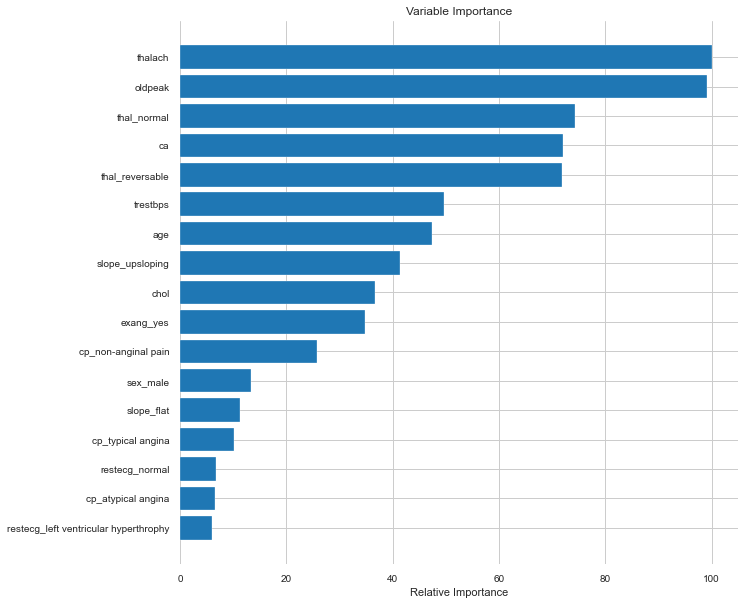

In [43]:
##feature importance
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Conclusions

1. Model: 
  * Ridge regression has better performance in terms of recall score, compared to random forest 
  * The Ridge regression model with fine tunned hyperparameters had values of **Precision:0.806 / Recall:0.829 / Accuracy:0.829 / AUC:0.884**
2. Top risk factors/symptoms of heart disease include --- not consistent btw different algorithms:
  * **ca**: 
  * **thal_reversable**: 
  * **cp**: 
3. Future improvement:
  * collecting more features?
  * try more models: SVM, XGBoost etc.
  * use more metrics (e.g. recall-precision trade-off etc.)
  * interactive dashboard
